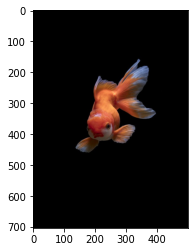

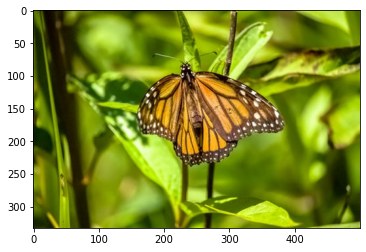

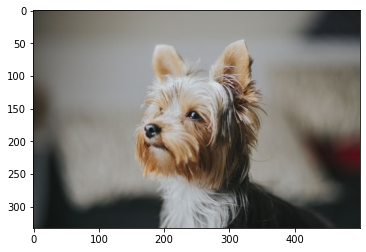

In [4]:
import os as os
from tensorflow.keras.preprocessing import image as keras_image
import matplotlib.pyplot as plt
photo_location='sample_images/'
for name in os.listdir(photo_location):
    if name.startswith('.'):
        continue
    img=keras_image.load_img(photo_location+name)
    plt.imshow(img)
    plt.show()
        

<class 'PIL.Image.Image'>


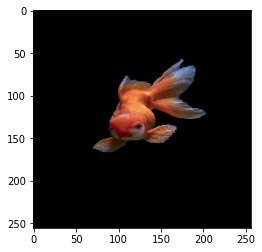

<class 'PIL.Image.Image'>


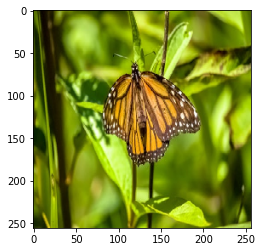

<class 'PIL.Image.Image'>


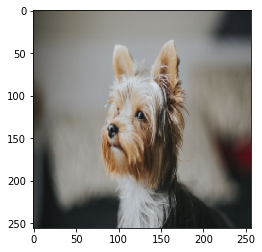

In [6]:
import os as os
from tensorflow.keras.preprocessing import image as keras_image
import matplotlib.pyplot as plt
photo_location='sample_images/'
for name in os.listdir(photo_location):
    if name.startswith('.'):
        continue
    img=keras_image.load_img(photo_location+name,target_size=(256,256))
    print(type(img))
    plt.imshow(img)
    plt.show()
        

In [44]:
from PIL import Image,ImageOps
import numpy as np
def square_image(image,background_color=(0,0,0)):
    width,height=image.size
    if(width==height):
        result=image
    elif(width>height):
        result=Image.new(image.mode,(width,width),background_color)
        result.paste(image,(0, (width-height) // 2))
    else:
        result=Image.new(image.mode,(height,height),background_color)
        result.paste(image,((height-width) // 2, 0))
    return result
        
def load_maintain_aspect_ratio(input_image_path,target_size):
    image = Image.open(input_image_path)
    image = square_image(image).resize(target_size)

    image=np.array(image.getdata()).reshape(image.size[0],image.size[1],3)
    return np.divide(image,255)

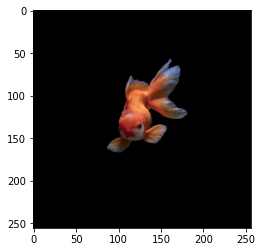

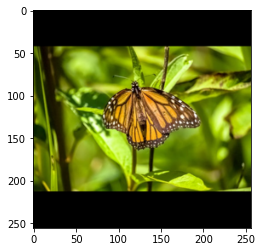

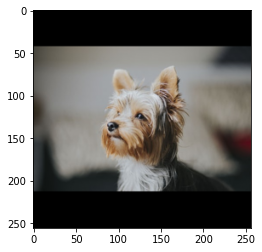

In [45]:
import os as os
from tensorflow.keras.preprocessing import image as keras_image
import matplotlib.pyplot as plt
photo_location='sample_images/'
for name in os.listdir(photo_location):
    if name.startswith('.'):
        continue
    img = load_maintain_aspect_ratio(photo_location + name, target_size=(256, 256))

    plt.imshow(img)
    plt.show()
        

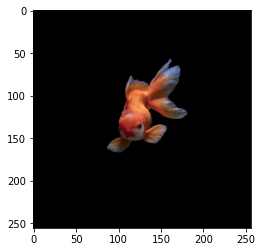

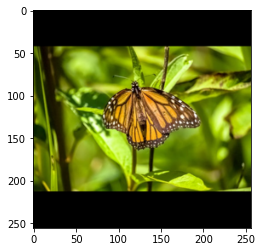

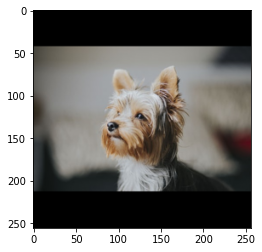

In [56]:
import os as os
from tensorflow.keras.preprocessing import image as keras_image
import matplotlib.pyplot as plt

images=[]

labels = np.array([0,1,2])

photo_location='sample_images/'
for name in os.listdir(photo_location):
    if name.startswith('.'):
        continue
    img = load_maintain_aspect_ratio(photo_location + name, target_size=(256, 256))
    images.append(img)
    
# Just prove to ourselves nothing has changed here:
images = np.array(images)
for im in images:
    plt.imshow(im)
    plt.show()    

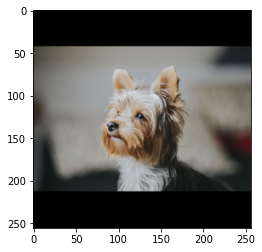

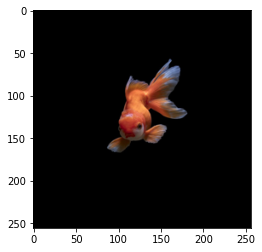

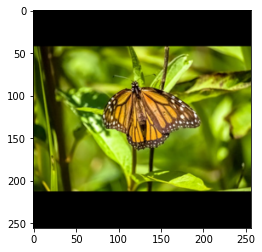

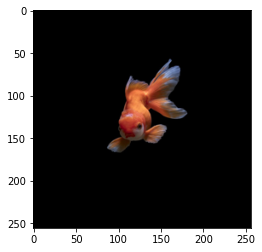

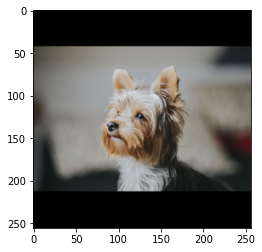

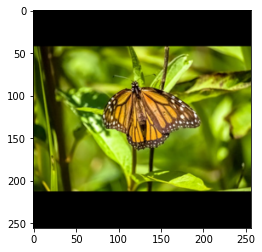

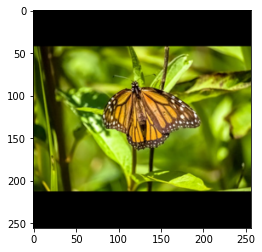

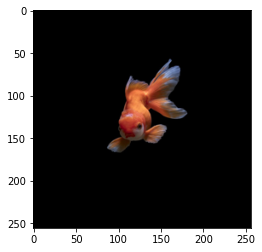

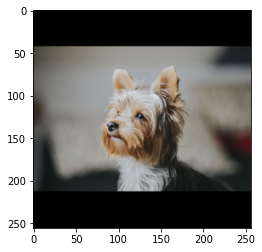

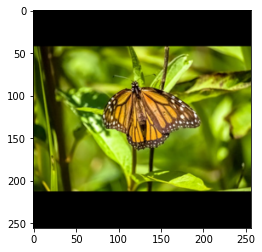

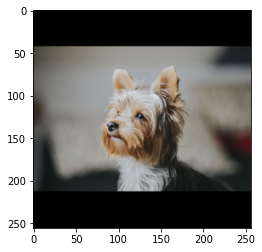

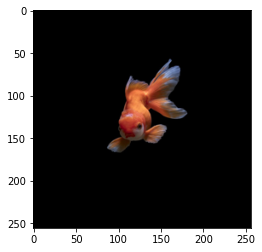

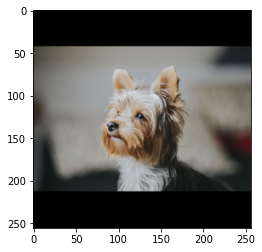

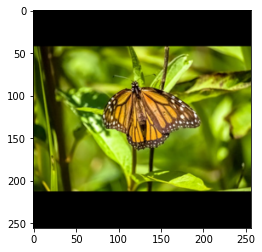

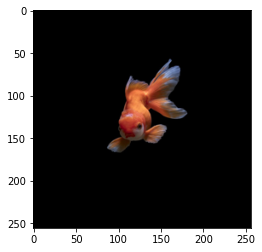

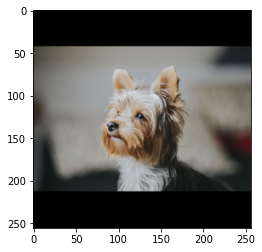

KeyboardInterrupt: 

In [58]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator()

for image_batch, label_batch in datagen.flow(images, labels):
    for image,lable in zip(image_batch, label_batch):
        plt.imshow(image)
        plt.show()

In [70]:
def display_images(datagen,rounds=1):
    plt.figure(figsize=(15,10))
    
    i=0
    for image_batch, label_batch in datagen.flow(images, labels):
        j=1;
        for image, lable in zip(image_batch,label_batch):
            ax=plt.subplot(rounds,3,(i*3)+j)
            ax.axis('off')
            plt.imshow(image)
            
            j+=1
            
        i+=1
        
        if i>=rounds: break
    plt.tight_layout()
    plt.show()

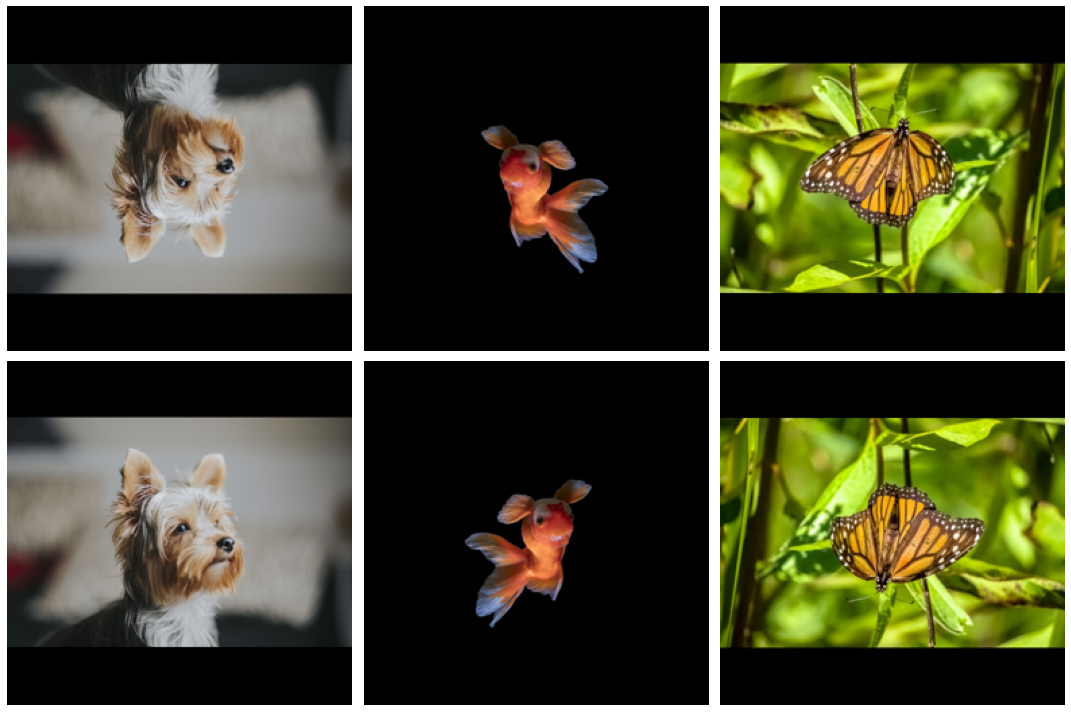

In [71]:
datagen=ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
)

display_images(datagen,2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


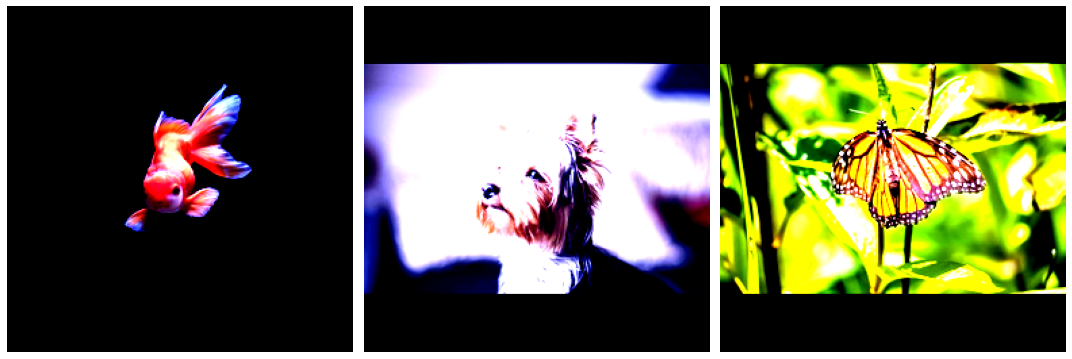

In [75]:
datagen=ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True
)

datagen.fit(images)

display_images(datagen,1)

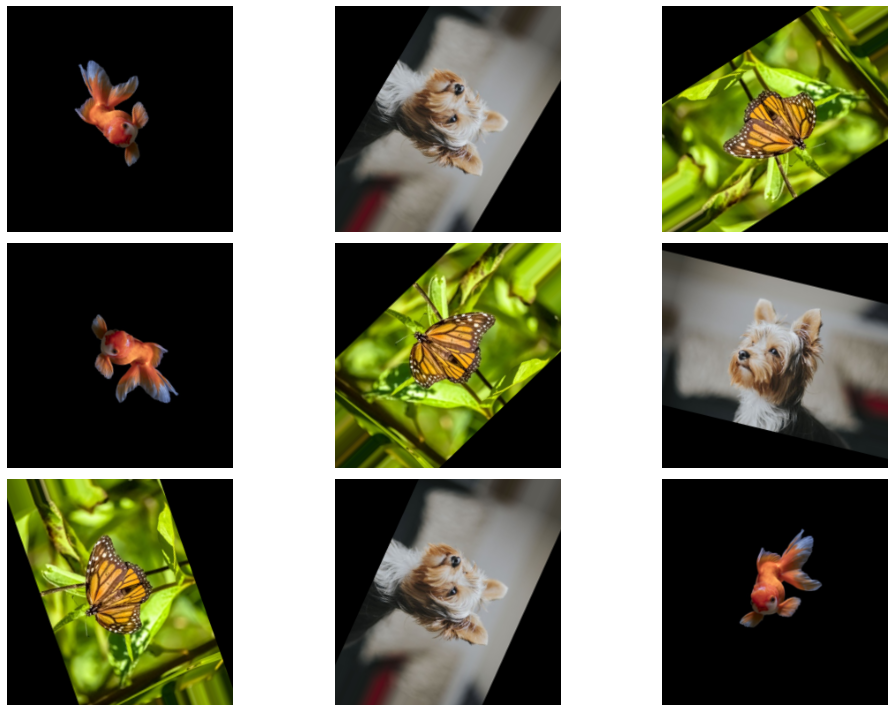

In [76]:
datagen=ImageDataGenerator(
rotation_range=360
)
datagen.fit(images)
display_images(datagen,3)

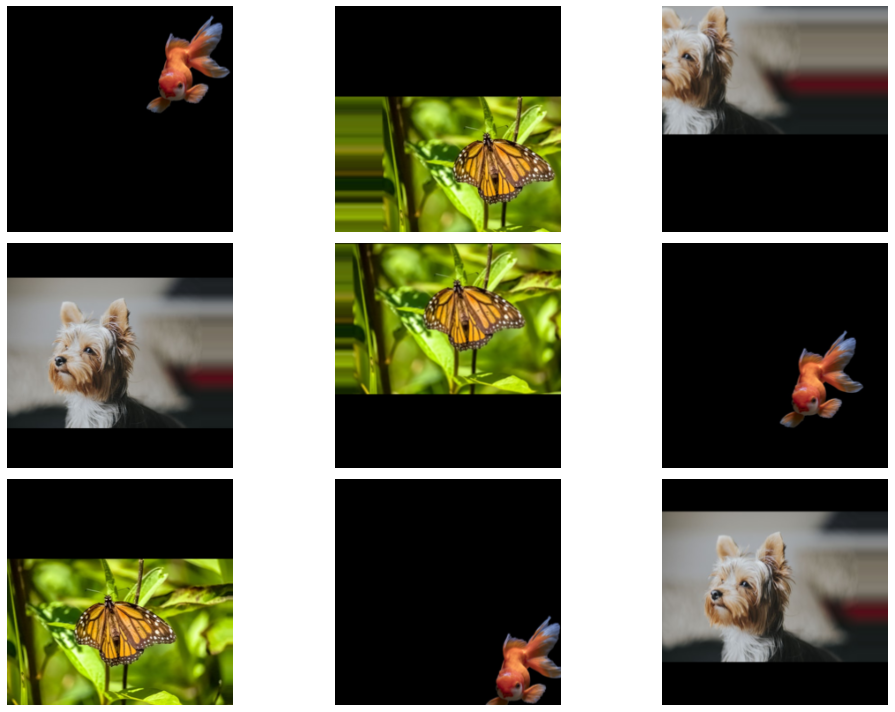

In [79]:
datagen=ImageDataGenerator(
    width_shift_range=100.0,
    height_shift_range=100.0
)
datagen.fit(images)
display_images(datagen,3)

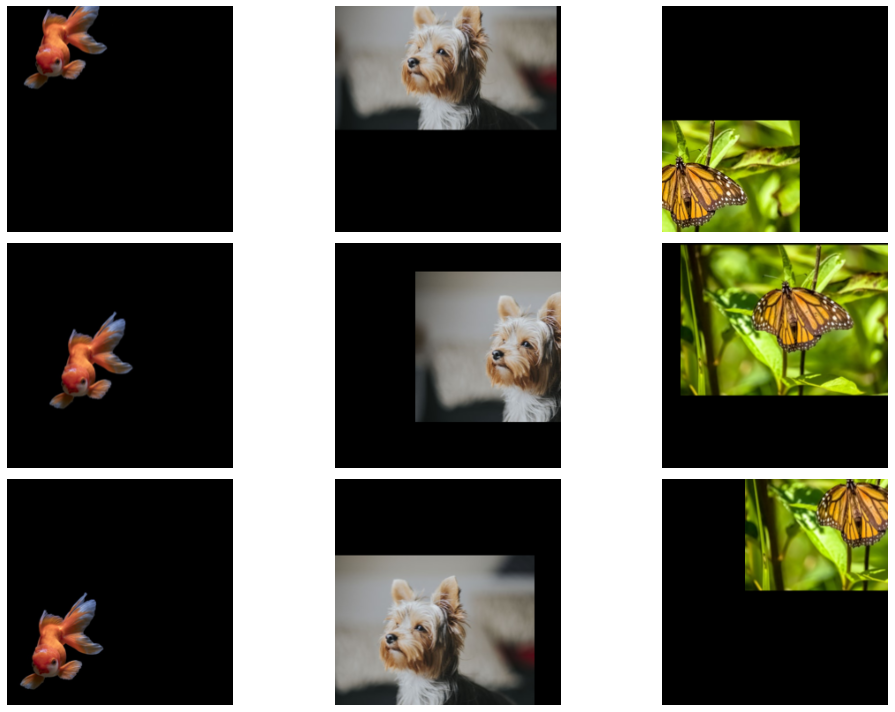

In [80]:
datagen=ImageDataGenerator(
    width_shift_range=100.0,
    height_shift_range=100.0,
    fill_mode='constant',
    cval=0
)
datagen.fit(images)
display_images(datagen,3)

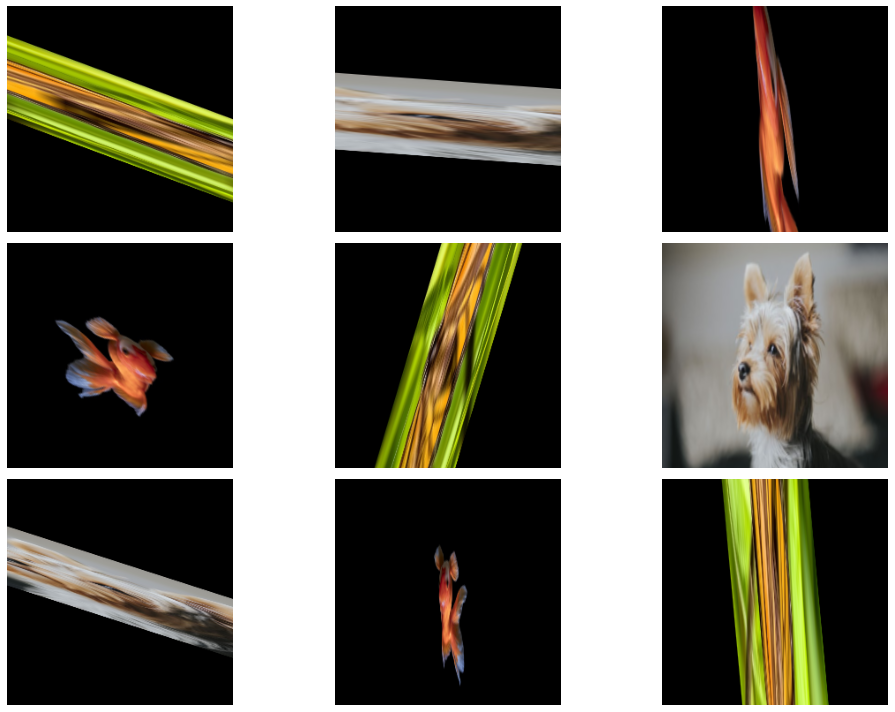

In [81]:
datagen=ImageDataGenerator(
    shear_range=360,
    zoom_range=2,
    fill_mode='constant',
    cval=0
)
datagen.fit(images)
display_images(datagen,3)

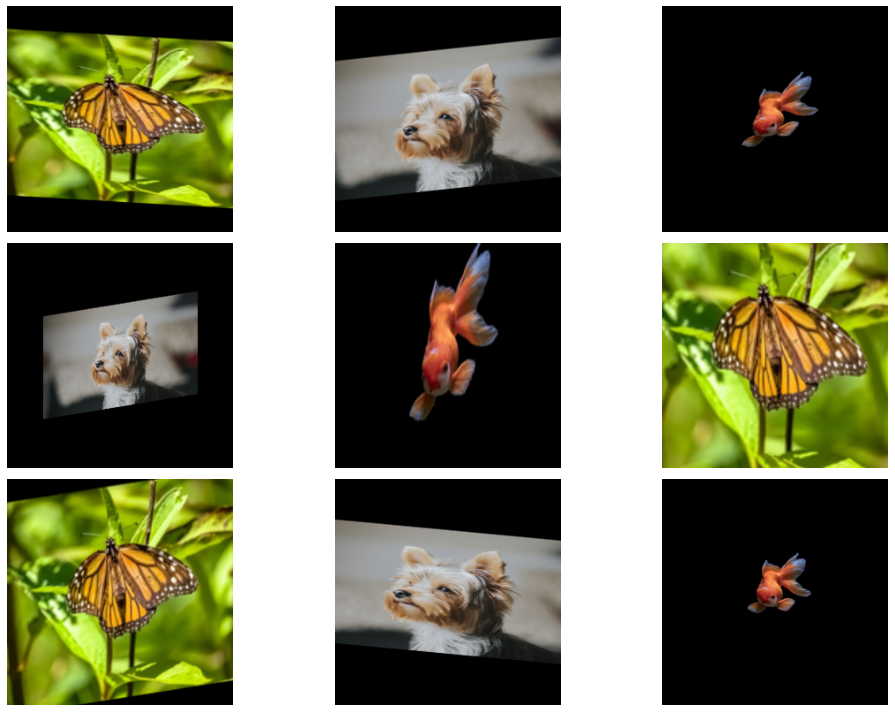

In [82]:
datagen=ImageDataGenerator(
    shear_range=10,
    zoom_range=0.5,
    fill_mode='constant',
    cval=0
)
datagen.fit(images)
display_images(datagen,3)

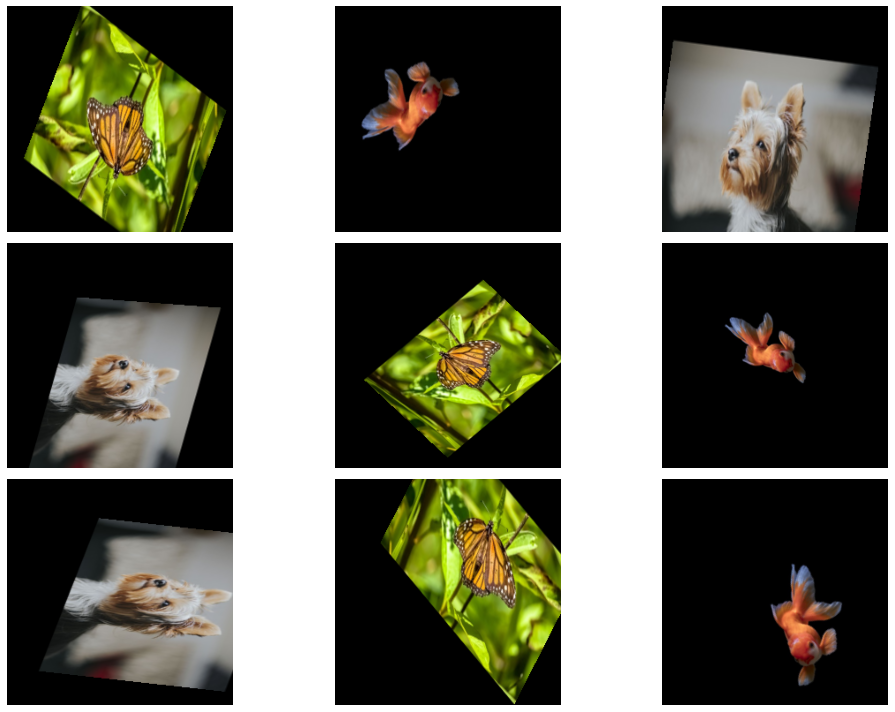

In [83]:
datagen=ImageDataGenerator(
    rotation_range=360,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=10,
    zoom_range=0.5,
    fill_mode='constant',
    cval=0
)
datagen.fit(images)
display_images(datagen,3)